In [1]:
import pandas as pd    
import numpy as np

df = pd.read_pickle('/work/NLP_Project/GenreFromLyricsShared/pkl_files/lemmatized.pkl')

In [2]:
df

,title,tag,artist,year,lyrics,id,lyrics_word_count,lemmatized_lyrics
0,Killa Cam,rap,Cam'ron,2004,"[killa, cam, killa, cam, cam, killa, cam, kill...",1,762,"[killa, cam, killa, cam, cam, killa, cam, kill..."
1,Can I Live,rap,JAY-Z,1996,"[yeah, hah, yeah, rocafella, invite, somethin,...",3,548,"[yeah, hah, yeah, rocafella, invite, somethin,..."
2,Forgive Me Father,rap,Fabolous,2003,"[maybe, cause, im, eatin, bastards, fiend, gru...",4,574,"[maybe, cause, im, eatin, bastard, fiend, grub..."
3,Down and Out,rap,Cam'ron,2004,"[ugh, killa, baby, kanye, 1970s, heron, flow, ...",5,760,"[ugh, killa, baby, kanye, 1970s, heron, flow, ..."
4,Fly In,rap,Lil Wayne,2005,"[ask, young, boy, gon, second, time, around, g...",6,432,"[ask, young, boy, gon, second, time, around, g..."
...,...,...,...,...,...,...,...,...
5913399,Everything Is Alright Now,pop,Chuck Bernard,2013,"[everything, alright, oh, yes, baby, everythin...",7882838,63,"[everything, alright, oh, yes, baby, everythin..."
5913401,White Lies,pop,ElementD,2019,"[half, truth, half, didnt, say, got, white, li...",7882840,171,"[half, truth, half, didnt, say, got, white, li..."
5913403,Ocean,pop,Effemar,2022,"[dance, keeping, moving, youre, boring, keep, ...",7882842,166,"[dance, keeping, moving, youre, boring, keep, ..."
5913406,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,"[purpose, feels, alive, memory, waking, hazy, ...",7882845,184,"[purpose, feel, alive, memory, waking, hazy, s..."


In [3]:
# Assuming 'lyrics' is a list of words
df['lemmatized_lyrics'] = df['lemmatized_lyrics'].apply(' '.join)


In [4]:
df

,title,tag,artist,year,lyrics,id,lyrics_word_count,lemmatized_lyrics
0,Killa Cam,rap,Cam'ron,2004,"[killa, cam, killa, cam, cam, killa, cam, kill...",1,762,killa cam killa cam cam killa cam killa cam ki...
1,Can I Live,rap,JAY-Z,1996,"[yeah, hah, yeah, rocafella, invite, somethin,...",3,548,yeah hah yeah rocafella invite somethin epic k...
2,Forgive Me Father,rap,Fabolous,2003,"[maybe, cause, im, eatin, bastards, fiend, gru...",4,574,maybe cause im eatin bastard fiend grub carry ...
3,Down and Out,rap,Cam'ron,2004,"[ugh, killa, baby, kanye, 1970s, heron, flow, ...",5,760,ugh killa baby kanye 1970s heron flow huh yeah...
4,Fly In,rap,Lil Wayne,2005,"[ask, young, boy, gon, second, time, around, g...",6,432,ask young boy gon second time around gon come ...
...,...,...,...,...,...,...,...,...
5913399,Everything Is Alright Now,pop,Chuck Bernard,2013,"[everything, alright, oh, yes, baby, everythin...",7882838,63,everything alright oh yes baby everything alri...
5913401,White Lies,pop,ElementD,2019,"[half, truth, half, didnt, say, got, white, li...",7882840,171,half truth half didnt say got white lie show d...
5913403,Ocean,pop,Effemar,2022,"[dance, keeping, moving, youre, boring, keep, ...",7882842,166,dance keeping moving youre boring keep feeling...
5913406,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,"[purpose, feels, alive, memory, waking, hazy, ...",7882845,184,purpose feel alive memory waking hazy sky crea...


In [5]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['lemmatized_lyrics'], df['tag'], test_size=0.2, random_state=42)

# Bag of Words
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

# TF-IDF
tfidf_vect = TfidfVectorizer()
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)


In [7]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, AllKNN
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

# Initialize the samplers
ros = RandomOverSampler(random_state=42)
smote = SMOTE(random_state=42)
rus = RandomUnderSampler(random_state=42)
allknn = AllKNN()

samplers = [ros, smote, rus, allknn]
sampler_names = ["Random Oversampling", "SMOTE", "Random Undersampling", "AllKNN"]
vectorizers = [X_train_counts, X_train_tfidf]
vectorizer_names = ["BoW", "TF-IDF"]

# Initialize the MultinomialNB
nb = MultinomialNB()

# Loop through all combinations of samplers and vectorizers
for sampler, sampler_name in zip(samplers, sampler_names):
    for X_train_vec, X_test_vec, vec_name in zip(vectorizers, [X_test_counts, X_test_tfidf], vectorizer_names):
        print(f"Running experiment with {sampler_name} and {vec_name}")
        
        # Resample the training data
        X_res, y_res = sampler.fit_resample(X_train_vec, y_train)
        
        # Fit the model to the resampled training data
        nb.fit(X_res, y_res)
        
        # Predict the labels of the test set
        y_pred = nb.predict(X_test_vec)
        
        # Generate classification report
        report = classification_report(y_test, y_pred)
        print(report)
        print("\n")


Running experiment with Random Oversampling and BoW
              precision    recall  f1-score   support

     country       0.13      0.68      0.22     17045
         pop       0.70      0.18      0.28    287549
         rap       0.86      0.75      0.80    199325
          rb       0.17      0.59      0.26     31679
        rock       0.38      0.65      0.48    127439

    accuracy                           0.47    663037
   macro avg       0.45      0.57      0.41    663037
weighted avg       0.65      0.47      0.47    663037



Running experiment with Random Oversampling and TF-IDF
              precision    recall  f1-score   support

     country       0.13      0.72      0.21     17045
         pop       0.73      0.17      0.28    287549
         rap       0.80      0.82      0.81    199325
          rb       0.16      0.58      0.25     31679
        rock       0.41      0.59      0.48    127439

    accuracy                           0.48    663037
   macro avg       0.4

KeyboardInterrupt: 

In [9]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, AllKNN
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from tqdm import tqdm

samplers = [None, RandomOverSampler(), SMOTE(n_jobs=-1), RandomUnderSampler(), AllKNN(n_jobs=-1)]
vectorizers = [CountVectorizer(), TfidfVectorizer()]

# Iterate over the samplers
for sampler in tqdm(samplers, desc='Samplers'):
    # Iterate over the vectorizers
    for vectorizer in tqdm(vectorizers, desc='Vectorizers', leave=False):
        if sampler:
            # Resample the training data
            X_res, y_res = sampler.fit_resample(X_train, y_train)

            # Transform the data using the vectorizer
            X_res_vect = vectorizer.fit_transform(X_res)
        else:
            # No resampling. Just transform the training data using the vectorizer
            X_res_vect = vectorizer.fit_transform(X_train)
            y_res = y_train

        X_test_vect = vectorizer.transform(X_test)

        # Train a Multinomial Naive Bayes classifier
        nb = MultinomialNB()
        nb.fit(X_res_vect, y_res)

        # Predict the labels of the test set
        y_pred = nb.predict(X_test_vect)

        # Print the name of the sampler (if any) and the vectorizer, as well as the classification report
        sampler_name = sampler.__class__.__name__ if sampler else 'No sampling'
        print(f'Sampler: {sampler_name}, Vectorizer: {vectorizer.__class__.__name__}')
        print(classification_report(y_test, y_pred))


Samplers:   0%|          | 0/5 [00:00<?, ?it/s]

Sampler: No sampling, Vectorizer: CountVectorizer


              precision    recall  f1-score   support

     country       0.33      0.19      0.24     17045
         pop       0.65      0.49      0.56    287549
         rap       0.83      0.79      0.81    199325
          rb       0.24      0.35      0.29     31679
        rock       0.39      0.62      0.48    127439

    accuracy                           0.59    663037
   macro avg       0.49      0.49      0.48    663037
weighted avg       0.63      0.59      0.60    663037

Sampler: No sampling, Vectorizer: TfidfVectorizer


Samplers:  20%|██        | 1/5 [10:57<43:49, 657.36s/it]

              precision    recall  f1-score   support

     country       0.00      0.00      0.00     17045
         pop       0.58      0.90      0.71    287549
         rap       0.80      0.83      0.82    199325
          rb       0.16      0.00      0.00     31679
        rock       0.69      0.05      0.09    127439

    accuracy                           0.65    663037
   macro avg       0.45      0.36      0.32    663037
weighted avg       0.63      0.65      0.57    663037



Samplers:  20%|██        | 1/5 [11:01<44:04, 661.15s/it]


ValueError: Expected 2D array, got 1D array instead:
array=['held monkey paw put wish play know god show motive delay im holding find one wish found pot gold something shining anyway caught reflection conviction held bay crafted cross adorn neck finally earned due respect jewel encrusted crown complement priestly gown big enough weigh bring temple ground inside without sound found pot gold today held monkey paw today put wish play thanked heaven trophy still hell pay brought spoil altar edge heard say obey instead labor best laid plan id earned reprimand forevermore understand dream come true kill man never graced sovereign hand held monkey paw'
 'sixseven thirty wake take makeup feel there something wrong there something wrong swear ive seen city hand look pretty hope feel night long feel night long tattoo wont stop bleeding snake head im feeding wont happy til gone happy til gone skin tight feel like leather red light stormy weather dont think go back home go back home'
 'coleman bonner fiddle playing fool he backwoods rounder breaker mule coleman bonners got wore bow he playing day new cut road colemans little sister said better act right coleman daddy gone louisville hell back tonight he going get another wagon good pair mule going move texas waiting colemans daddy pulled yard said pack life kid getting hard kentucky alright there many people well day thought saw church steeple coleman said daddy dont worry bout im going stay kentucky till day im going drink sourmash im going race mare find woman fox red hair moving west since day got married well im getting wagon daddy im old carried going stay kentucky bluegrass grow im going play night new cut road colemans daddy said whats comn young people day stubborn mule cant make go naw he old damned ole fiddle bolder hat colemans mama said let boy stay he raised solid find way honey im always thought kentucky passing colemans little sister started cry daddy shook head last time colemans mama said somebody got wouldnt kentucky le didnt stick coleman coleman bonner stood porch cabin watched go texas covered wagon pulled fiddle rosined bow played little tune called new cut road'
 ...
 'neco bout shootya cacash twentythree yea im ballin crazy bitch ball baby yea ball baby yea ball baby yea ball uh since im mh yea since im mh yea since i ’ m youngin tho saw hunnits trap knew hustle cash want money money since i ’ m youngin tho saw struggle struggle hustle one hunnit get juggin juggin since i ’ m youngin tho saw hustle yea knew hunnits trap want money trap trap since i ’ m youngin tho i ‘ ve bold hungry hungry i ‘ ve bold hungry hungry i ‘ ve bold hungry yea yea try go gang designer know mean mean try go make vibe fly shit living life get cream clean try get scene baby always cut yea yea making money run yea yea try get guap guap always shit try get rich rich keep player bitch bitch know get wrist yah i ’ m living life try get hunnits ain ’ t understand yea get profit getting money yea living life woah businessman ain ’ t g woah woah try get real rich huh making money gang bitch yah try get money try goin making gang shit gang shit go crazy ain ’ t average yuh ballin hard i ’ m savage yuh i ’ m pullin bad bitch shit like it ’ s magic yea that ’ s classic huuurgh sky ain ’ t limit know mean quittin quittin killing shit killing shit yea yea big cash get money get dough nigga hate cause got flow get ice know go ballin crazy know lebron since i ’ m youngin tho saw hunnits trap knew hustle cash want money money since i ’ m youngin tho saw struggle struggle hustle one hunnit get juggin juggin since i ’ m youngin tho saw hustle yea knew hunnits trap want money trap trap since i ’ m youngin tho i ‘ ve bold hungry hungry i ‘ ve bold hungry hungry i ‘ ve bold hungry hungry'
 'yo pierre yo pi ’ erre huh yeah yeah yeah uh yeah huh spent two hundred band foreign car yeah fuckin bitch like shes pornstar yeah i ’ m japan foreign broad yeah watch back street stay heat im drillers apply murder stuck mind wan na spark everyday used think killin opps maybe im savage regular like thirty clip fit glock one folk died shot fired aint duckin still block went huntin got back turned clutchin bendin ’ block got lemon squeeze xd ain ’ t playin pullin ’ top got plaque went number one shouldnt hard see im winnin hard compete got question written x pill fuckin ’ bad hoe im smilin chill top fan say polo greatest like im spittin like gon give prop need wet floor sign pull nigga drippin lot ayy uh yeah huh spent two hundred band foreign car yeah fuckin bitch like shes pornstar yeah im japan foreign broad yeah'
 'time wont refuse abusive im right motherfucker time wont refuse abusive page never change blurring thats reason im still hurting thats reason still throw ash hollow abyss im falling scar running neck want walk earth alone im right motherfucker wont accept happiness im dirt im falling drug lead heart attack time wont refuse time wont refuse cynical running back insecure watch kingdom fall piece watch kingdom fall piece watch kingdom fall im stood edge existence inner system time wont refuse abusive fuck playing victim fuck playing victim falling hand im always one blame falling hand im always one blame im always one blame im someone cant saved im someone cant saved im someone cant saved im someone cant saved time wont refuse time wont refuse cynical running back insecure watch kingdom fall piece watch kingdom fall piece watch kingdom fall cynical insecure watch kingdom fall piece watch kingdom fall piece watch kingdom fall'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [26]:
!pip uninstall imblearn

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, AllKNN
from imblearn.pipeline import make_pipeline
from tqdm.auto import tqdm
from sklearn.neighbors import KNeighborsClassifier

# Initialize a KNeighborsClassifier with n_jobs=-1

#knn = KNeighborsClassifier(n_jobs=-1)
# Pre-vectorized training and testing data
datasets = [
    ("CountVectorizer", X_train_counts, X_test_counts),
    ("TfidfVectorizer", X_train_tfidf, X_test_tfidf)
]

samplers = [

    #("RandomOverSampler", RandomOverSampler(random_state=42)),
    ("RandomUnderSampler", RandomUnderSampler(random_state=42)),
    ("AllKNN", AllKNN(n_jobs=-1))
]

# Initialize Naive Bayes
nb = MultinomialNB()


for sampler_name, sampler in tqdm(samplers, desc='Samplers'):
    for vectorizer_name, X_train_vect, X_test_vect in tqdm(datasets, desc='Vectorizers', leave=False):

        if sampler:
            # Resample the training data
            X_resampled, y_resampled = sampler.fit_resample(X_train_vect, y_train)
           
            # Fit the model to the resampled data
            nb.fit(X_resampled, y_resampled)
        else:
            # Fit the model to the training data
            nb.fit(X_train_vect, y_train)

        # Predict the labels of the test set
        y_pred = nb.predict(X_test_vect)

        print(f"Sampler: {sampler_name}, Vectorizer: {vectorizer_name}")
        report = classification_report(y_test, y_pred)
        print(report)


Samplers:   0%|          | 0/2 [00:00<?, ?it/s]

Sampler: RandomUnderSampler, Vectorizer: CountVectorizer


              precision    recall  f1-score   support

     country       0.12      0.67      0.21     17045
         pop       0.72      0.13      0.23    287549
         rap       0.79      0.82      0.80    199325
          rb       0.14      0.65      0.23     31679
        rock       0.42      0.54      0.47    127439

    accuracy                           0.46    663037
   macro avg       0.44      0.56      0.39    663037
weighted avg       0.64      0.46      0.45    663037

Sampler: RandomUnderSampler, Vectorizer: TfidfVectorizer


Samplers:  50%|█████     | 1/2 [00:55<00:55, 55.09s/it]

              precision    recall  f1-score   support

     country       0.11      0.71      0.19     17045
         pop       0.77      0.07      0.12    287549
         rap       0.63      0.93      0.75    199325
          rb       0.15      0.40      0.22     31679
        rock       0.43      0.50      0.46    127439

    accuracy                           0.44    663037
   macro avg       0.42      0.52      0.35    663037
weighted avg       0.62      0.44      0.38    663037



Samplers:  50%|█████     | 1/2 [1:17:44<1:17:44, 4665.00s/it]


KeyboardInterrupt: 

In [14]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the MultinomialNB
nb = MultinomialNB()

# Fit the model to the training data
nb.fit(X_train_tfidf, y_train)

# Predict the labels of the test set
y_pred = nb.predict(X_test_tfidf)

In [15]:
from sklearn.metrics import accuracy_score

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.6518927299683125


In [16]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

     country       0.00      0.00      0.00     17045
         pop       0.58      0.90      0.71    287549
         rap       0.80      0.83      0.82    199325
          rb       0.16      0.00      0.00     31679
        rock       0.69      0.05      0.09    127439

    accuracy                           0.65    663037
   macro avg       0.45      0.36      0.32    663037
weighted avg       0.63      0.65      0.57    663037



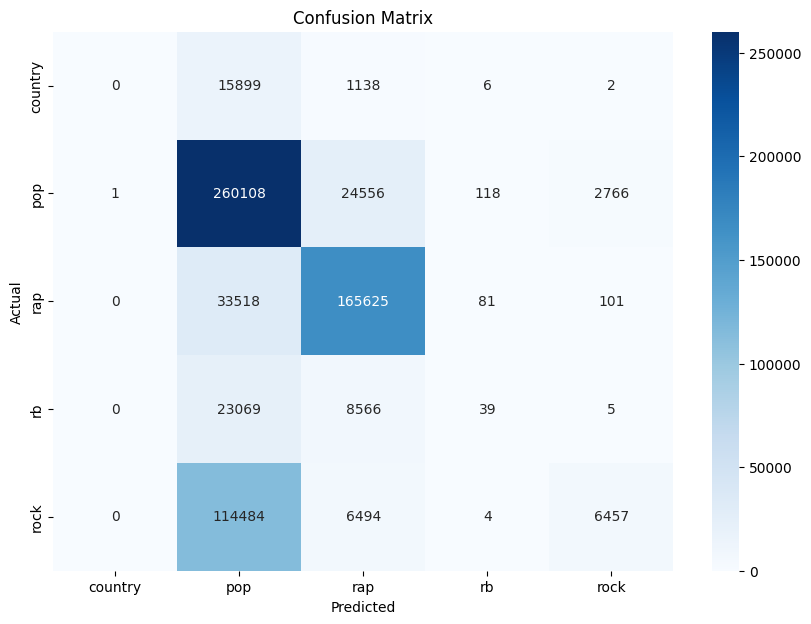

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=nb.classes_, columns=nb.classes_)

plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
